In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_excel('C:/Users/shurastogi/Desktop/Hackathons/Final Participant Data Folder/Final_Train.xlsx')
df_test=pd.read_excel('C:/Users/shurastogi/Desktop/Hackathons/Final Participant Data Folder/Final_Test.xlsx')

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.2+ KB


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df_train['Qualification_count']=0
for index,row in df_train.iterrows():
    r=row['Qualification']
    df_train.at[index,'Qualification_count']=len(r.split(','))

In [6]:
df_train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [7]:
df_train['Experience'] = df_train['Experience'].str.split(' years experience').map(lambda x: x[0])

In [8]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_count
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,2
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1


In [9]:
# We cant make any inference from the rows which have "Get inspired by remarkable stories of people like you" dropping these rows
#df_train.drop(df_train[df_train.Qualification =='Get inspired by remarkable stories of people like you'].index, inplace=True)
#Also for a row where we dont have Misc infor rating and place in not defined better to not proceed
df_train.drop(df_train[df_train.Place=='e'].index,inplace=True)

In [10]:
#Also making inferencce which have 39 years Experiecnce is not possible as it has neither rating or Miscellaneous Info
df_train.drop(df_train[df_train.Qualification =='39 years experience'].index, inplace=True)
#also ingore case where rating,info,place all are null
df_train.drop(df_train[df_train.Place.isnull()].index, inplace=True)

In [11]:
demographics_inf = df_train["Place"].str.rsplit(",",1, expand = True)


In [12]:
df_train['Area']=demographics_inf[0]
df_train['City']=demographics_inf[1]

In [13]:
df_train.drop(['Place'],axis=1,inplace=True)


In [14]:
df_train.City.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: City, dtype: int64

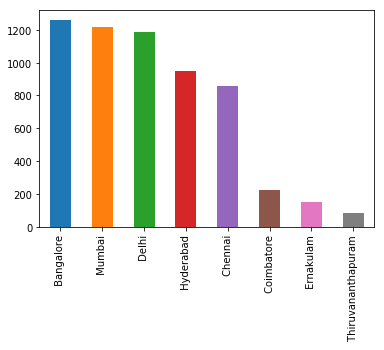

In [15]:
#number of doctors per city
df_train['City'].value_counts().plot.bar()

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


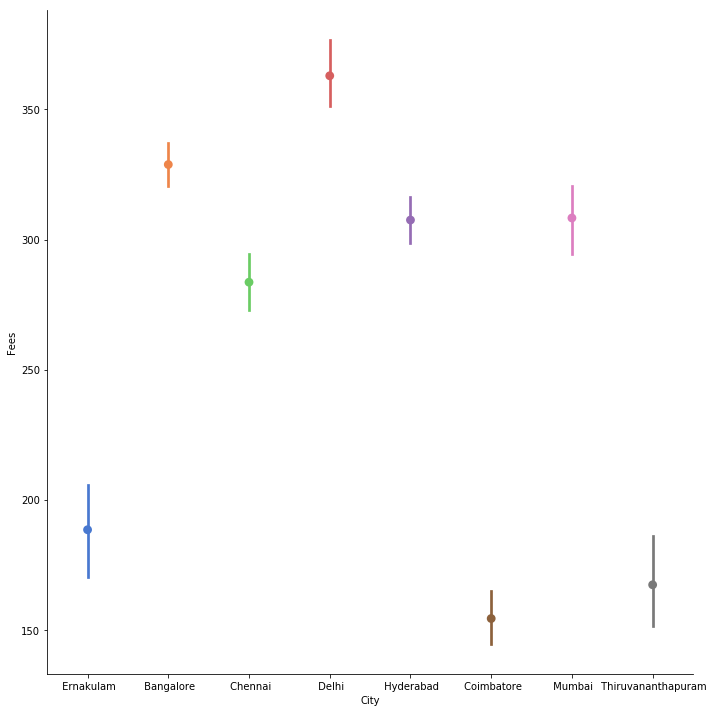

In [16]:
sns.factorplot(x="City", y="Fees", data=df_train, strip="bar", height = 10,palette = "muted")
#THIS Graph show fees being high in city like bangalore,delhi chennai compared to small cities like Ernakulam

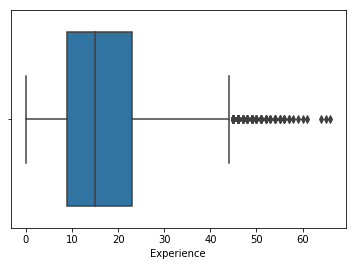

In [17]:
df_train['Experience'] =df_train['Experience'].astype(str).astype(int)
sns.boxplot(x=df_train['Experience'])

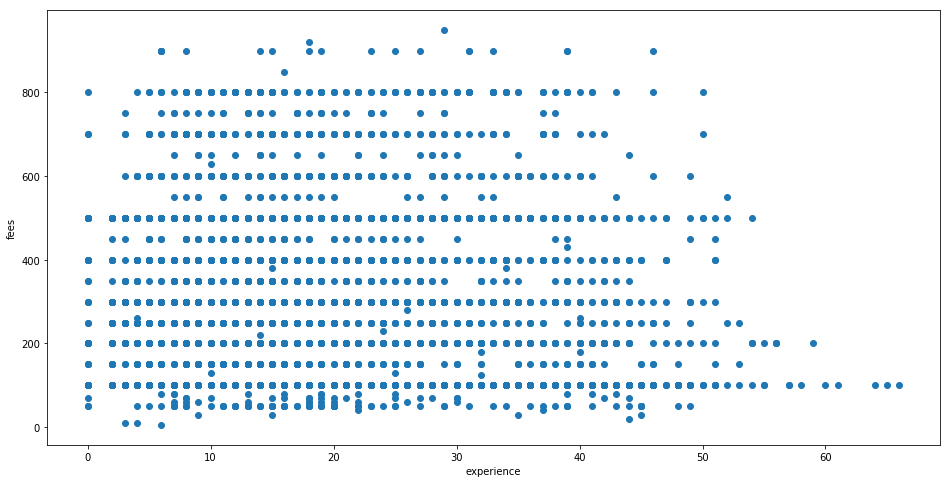

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_train['Experience'], df_train['Fees'])
ax.set_xlabel('experience')
ax.set_ylabel('fees')
plt.show()

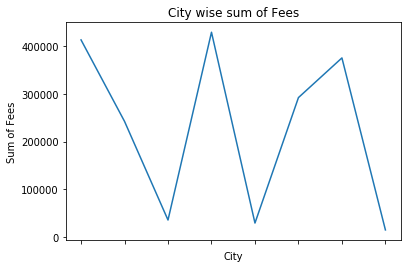

In [19]:
var = df_train.groupby('City').Fees.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('City')
ax1.set_ylabel('Sum of Fees')
ax1.set_title("City wise sum of Fees")
var.plot(kind='line')

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


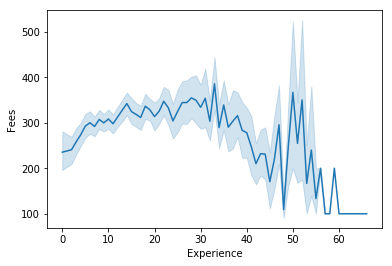

In [20]:
sns.lineplot(x='Experience',y='Fees',data=df_train,sort=True)

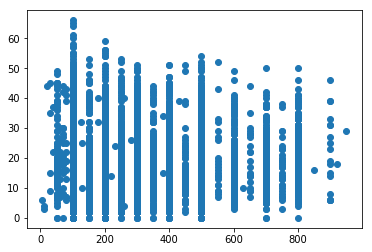

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_train['Fees'],df_train['Experience']) 
plt.show()

In [22]:
df_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Qualification_count,Area,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,2,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,Keelkattalai,Chennai


In [23]:
df_train['Feedback_count']=0

In [24]:
count=0
for row in df_train['Miscellaneous_Info']:
    if pd.isnull(row):
        x=0
    elif 'Feedback' in row:
        x=row.split('Feedback')[0]
        x=x[-4:-1].strip()
        if ' ' in x:
            x=x.split(' ')[1]
    else:
        x=0
    df_train['Feedback_count'][count]=int(x)
    count=count+1

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [25]:
#get fees count from miscellaneous
for index,r in df_train.iterrows():
    row=r['Miscellaneous_Info']
    if pd.isnull(row):
        x=0
    elif '₹' in row:
        x=row.split('₹')[1]
        x=x[0:5]
        if(x[-1].isalpha()):
            x=x[0:4].strip()
        x=x.replace(',','')
    else:
        x=0
    if(x!=0):
        if(int(r['Fees'])!= int(x)):
            df_train.at[index,'Fees_Discrepancy']=x
        else:
            df_train.at[index,'Fees_Discrepancy']=r['Fees']
    else:
        df_train.at[index,'Fees_Discrepancy']=r['Fees']

In [26]:
df_train.loc[df_train['Fees_Discrepancy'] != df_train['Fees']]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Qualification_count,Area,City,Feedback_count,Fees_Discrepancy
672,"MBBS, MD - Medicine, FCSI, FSCAI",39,NaN,General Medicine,"Mahim, Mumbai ₹1,200 Available Today",100,4,Mahim,Mumbai,0,1200.0
770,"MBBS, MS - General Surgery, MCh - Urology, DNB...",34,NaN,General Medicine,"4 Feedback Mahim, Mumbai ₹1,200",100,4,Mahim,Mumbai,0,1200.0
996,BHMS,2,NaN,Homeopath,"Andheri East, Mumbai ₹1,000 Visits Today",100,1,Andheri East,Mumbai,0,1000.0
1038,BDS,24,NaN,Dentist,"Prabhadevi, Mumbai ₹1,000 Visits On-Call",100,1,Prabhadevi,Mumbai,0,1000.0
1039,MS - ENT,34,NaN,ENT Specialist,"Saket, Delhi ₹1,350 Available Tomorrow",100,1,Saket,Delhi,0,1350.0
1077,"MBBS, MD - Cardiology, DM - Cardiology",19,NaN,General Medicine,"1 Feedback Chembur, Mumbai ₹1,200",100,3,Chembur,Mumbai,0,1200.0
1141,"MBBS, MS - ENT, DNB",21,NaN,ENT Specialist,"3 Feedback Parel, Mumbai ₹1,750",100,3,Parel,Mumbai,0,1750.0
1471,"BHMS, MD - Homeopathy",11,NaN,Homeopath,"Borivali East, Mumbai ₹475₹5005% OFF* Availabl...",100,2,Borivali East,Mumbai,0,475.0
1601,"MBBS, MD - General Medicine",28,NaN,General Medicine,"Vileparle West, Mumbai ₹1,200₹150020% OFF* Ava...",100,2,Vileparle West,Mumbai,0,1200.0
1683,MD - General Medicine,9,NaN,General Medicine,"Andheri West, Mumbai ₹1,200 Available Today",100,1,Andheri West,Mumbai,0,1200.0


In [27]:
#clearly there is a mismatch between 29 rows for fees since these doc are belong to Mumbai and delhi and have common fees of 100 ,this might an issue with data gathering so update fees for this rows
#df_train.loc[df_train['Fees'] != df_train['Fees_Discrepancy'], 'Fees'] = df_train['Fees_Discrepancy']

In [28]:
#lets drop miscellaneous and fees_discripancy
df_train.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [29]:
def sortGroup(str):
    arr = str.split(',')
    arr = [x.strip(' ') for x in arr]
    arr = sorted(arr)
    print(arr)
    return ','.join(arr)

In [30]:
for index,row in df_train.iterrows():
    r=row['Qualification']
    df_train.at[index,'Qualification']=sortGroup(r)

['BHMS', 'MD - Homeopathy']
['BAMS', 'MD - Ayurveda Medicine']
['MBBS', 'MS - Otorhinolaryngology']
['BAMS', 'BSc - Zoology']
['BAMS']
['BAMS']
['BHMS']
['BDS']
['MBBS', 'MD - General Medicine']
['BDS', 'BSc']
['DNB - ENT', 'MBBS', 'MS']
['BAMS']
['BDS', 'MDS']
['BDS', 'MDS - Oral & Maxillofacial Surgery']
['DNB - ENT', 'Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['MBBS', 'MD - General Medicine']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['MBBS', 'MF- Homeopathy']
['MBBS', 'MS - ENT']
['MBBS']
['BDS', 'DNB', 'MDS']
['DNB - ENT', 'MBBS']
['MBBS']
['Fellowship of College of General Practice (FCGP)', 'MBBS']
['DDVL', 'MBBS']
['BDS']
['IBCLC (USA)', 'MBBS']
['MBBS', 'MD - General Medicine', 'Post Graduate Diploma in Diabetology (PGDD)']
['BDS', 'MDS']
['Diploma in Dermatology', 'MBBS']
['DDVL', 'Fellowship in Aesthetic Medicine', 'MBBS']
['BDS']
['MBBS', 'MS - ENT']
['DM - Neurology', 'MBBS', 'MD - Pediatrics']
['BAMS']
['BDS', 'Fellowship in Cleft Lip and Craniofacial Surgery',

['BAMS', 'Fellowship in Applied Nutrition(FAN)']
['BDS', 'MDS - Paedodontics And Preventive Dentistry']
['BHMS']
['BHMS']
['BAMS']
['BAMS']
['BDS']
['DNB - Otorhinolaryngology', 'Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['BDS']
['MBBS', 'PhD - Clinical Neuroscience (Pediatrics)']
['MBBS']
['MBBS', 'MD - Medicine', 'Professional Diploma in Clinical Research (PDCR)']
['BHMS']
['BAMS']
['BDS']
['MD - General Medicine']
['BHMS']
['MBBS', 'MS - Otorhinolaryngology']
['BDS']
['MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['DHMS (Diploma in Homeopathic Medicine and Surgery)', 'MD - Homeopathy']
['MBBS', 'MS - ENT']
['BDS', 'FICD', 'FICOI']
['BAMS']
['BDS', 'MDS - Periodontology and Oral Implantology']
['MBBS', 'MD - Dermatology']
['BDS']
['Fellowship of College of General Practice (FCGP)', 'MD - Physician']
['DDV', 'MBBS']
['BNYS', 'BSAM']
['BHMS']
['BHMS']
['MBBS', 'MD - General Medicine']
['MBBS', 'MD - General Medicine']
['MBBS', 'MS - ENT']
['Advanced Certificate Course in Ae

['M.D. (Psychiatry)', 'MBBS']
['BDS', 'MDS']
['BDS']
['BAMS', 'MD - Internal Medicine', 'MS - Counselling and Psychotherapy', 'PG Diploma In Emergency Trauma Care']
['BHMS', 'FCAH (Fellow ship course in Advance Homoepath)']
['BAMS']
['MDS - Oral & Maxillofacial Surgery']
['MBBS', 'MD - General Medicine', 'Post Graduate Diploma in Diabetology (PGDD)(Middlesex University', 'UK)']
['Diploma in Aesthetic Medicine', 'Diploma in Dermatology', 'Diploma in Practical Dermatology', 'MBBS']
['BAMS', 'BAMS', 'Fellow of Academy of General Education (FAGE)', 'MD - Ayurveda Medicine']
['DNB - ENT', 'Diploma in Otorhinolaryngology (DLO)', 'MBBS', 'MS - ENT']
['BDS', 'MDS - Periodontics']
['BDS']
['BAMS', 'MBBS', 'MD - Ayurveda Medicine']
['BDS', 'Post-Graduate Certificate in Oral Implantology (PGCOI)']
['DVD', 'MBBS', 'MD - Dermatology']
['DNB - Dermatology & Venereology', 'MBBS', 'MD - Dermatology']
['BHMS']
['BDS', 'PG Diploma In Clinical Cosmetology (PGDCC)']
['Diploma in Dermatology', 'MD - Dermat

['DLO', 'MBBS', 'MS - ENT']
['BDS', 'MBA - HealthCare Management', 'MDS']
['DHMS (Diploma in Homeopathic Medicine and Surgery)']
['DNB - Internal Medicine', 'M.H.Sc-Diabetology', 'MBBS', 'MD - General Medicine', 'MNAMS (Membership of the National Academy)']
['MBBS']
['BDS', 'Diploma in Implanthology', 'MDS - Oral & Maxillofacial Surgery']
['BHMS']
['MBBS', 'Post Graduate Diploma in Diabetology (PGDD)']
['DDV', 'MBBS']
['DGO', 'MBBS']
['MBBS']
['CCEBDM', 'MD - Physician', 'MS - Otorhinolaryngology']
['BAMS']
['DNB - Otorhinolaryngology', 'Fellowship in Head & Neck Oncology Surgery', 'MBBS']
['MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['BDS', 'Certificate Course in Nutrition and Dietetics', 'Certificate Course in Sports and Fitness Nutrition', 'Certified Advance Course In Endodontics', 'Fellow of Academy of General Education (FAGE)']
['BDS', 'Post-Graduate Certificate in Oral Implantology (PGCOI)']
['BHMS']
['BHMS', 'PhD - Acupuncture']
['BAMS']
['MBBS', 'MS - ENT']
['DNB - ENT

['MBBS', 'MS - Otorhinolaryngology']
['BAMS']
['BDS', 'MBBS']
['BDS', 'MDS - Oral & Maxillofacial Surgery', 'PhD - Orthodontics & Dentofacial Orthopaedics']
['BAMS', 'MD - Ayurveda Medicine']
['DVD', 'MBBS', 'MD - Dermatology']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS', 'MS - ENT']
['BDS', 'FICOI', 'MDS - Prosthodontist & Oral Implantologist']
['MBBS', 'MD - General Medicine']
['BHMS']
['BHMS']
['MBBS']
['MBBS', 'MS - ENT']
['BHMS']
['DDVL', 'MBBS']
['MBBS']
['BHMS', 'MD - Homeopathy']
['MBBS']
['BDS']
['BHMS']
['BHMS', 'MD - Homeopathy']
['MBBS', 'MS - ENT']
['BDS']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS', 'MS - ENT']
['BHMS']
['BHMS', 'MD - Homeopathy']
['BDS']
['BHMS']
['BAMS']
['MBBS', 'MD - Dermatology']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['MBBS', 'MD - Internal Medicine']
['BHMS', 'MBA (HCS)']
['FRGUHS', 'MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['BDS']
['BDS', 'MDS - Prosthodontist And Crown Bridge']
['BDS', 'MDS - Paedodontics And Preventi

['MBBS']
['MBBS', 'MD - Physiology', 'Post Graduate Diploma in Diabetology (PGDD)']
['MBBS']
['F.A.M', 'MBBS', 'Post Graduate Diploma in Diabetology (PGDD)']
['BHMS']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['BHMS']
['BAMS', 'MD - Ayurveda Medicine']
['MBBS', 'MD - Dermatology']
['MBBS']
['DNB', 'DNB - Dermatology & Venereology', 'Diploma in Dermatology', 'MBBS', 'MD - Dermatology']
['BHMS']
['DDVL', 'MBBS']
['BDS', 'MDS - Paedodontics And Preventive Dentistry']
['Fellowship In Laryngology Bronchoesophagology', 'Fellowship In Phonosurgery', 'Fellowship in laryngology', 'MBBS', 'MS - Otorhinolaryngology']
['Diploma in Cardiology', 'MBBS', 'MD - General Medicine']
['BHMS']
['BDS', 'MDS - Conservative Dentistry & Endodontics', 'MSc']
['MBBS', 'MD - Dermatology']
['MBBS', 'MD - General Medicine']
['DNB - ENT', 'Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['BDS', 'MDS - Oral & Maxillofacial Surgery']
['BHMS', 'MD - Alternate Medicine', 'Master of Hospital Administration']
['DNB 

['BDS', 'MDS']
['BAMS']
['BHMS']
['BAMS']
['BDS']
['BDS', 'MDS - Prosthodontics']
['BDS', 'MDS']
['MBBS', 'Post Graduate Diploma in Hospital & Healthcare Management']
['BAMS']
['BHMS', 'CGO']
['BDS', 'Certificate of Oral Implantology']
['BAMS']
['BHMS']
['BDS', 'MDS - Periodontology and Oral Implantology', 'PG in Laser Dentistry']
['MBBS', 'MD - General Medicine', 'Post Graduate Diploma in Diabetology (PGDD)']
['BDS', 'Certificate of Oral Implantology', 'MDS - Orthodontics']
['DNB - Family Medicine', 'MBBS']
['BAMS']
['BDS']
['DNB - Dermatology & Venereology', 'DVD', 'MBBS', 'MCPS']
['BDS']
['MBBS', 'MD - General Medicine']
['BDS']
['DDVL', 'MBBS']
['BHMS']
['BHMS', 'Diploma in Diet and Nutrition', 'Diploma in Obesity & Pain management', 'PG Diploma In Clinical Cosmetology (PGDCC)']
['BAMS', 'Family Welfare and Population', 'Post Graduate Diploma in Health']
['B.Sc', 'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'DIH']
['BHMS']
['BAMS']
['BAMS', 'MD - Ayurveda Medicine']
['BDS'

['BDS']
['MBBS', 'MS - ENT']
['BAMS']
['BAMS']
['MD - Physician']
['MBBS', 'MD - General Medicine']
['DDVL', 'FRGUHS', 'MBBS']
['BSc', 'DHMS', 'MD - Homeopathy', 'PhD - Homoeopathy']
['BAMS']
['MBBS', 'MD - Dermatology']
['Advanced Endotontic Course On Root Canal', 'BDS', 'Diploma in Implanthology']
['BDS', 'Post Graduate Certificate in Advanced Oral Implantology']
['MBBS', 'MD - Dermatology']
['BDS', 'MDS - Periodontology and Oral Implantology']
['MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['BDS', 'MDS - Conservative Dentistry & Endodontics']
['MBBS', 'MD - Dermatology']
['MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['MBBS', 'MD - Dermatology']
['MBBS', 'MS - ENT']
['DVD', 'MBBS']
['BDS']
['BDS']
['MD - Physician']
['MD - Medicine', 'PG in Diabetology']
['BAMS']
['BAMS']
['MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['BAMS', 'MD - Ayurveda Medicine']
['BHMS', 'Certificate Course in Advanced Homoeopathy (C.C.A.H)']
['BDS']
['BAMS', 'D.Y.A', 'MD - Ayurveda Medic

In [31]:
df_quali = df_train['Qualification'].str.split(',',expand=True)

In [32]:
df_quali.to_csv('qual.csv')

In [33]:
df_train['Qual_1'] = df_train['Qualification'].str.split(',').str[0]
df_train['Qual_2'] = df_train['Qualification'].str.split(',').str[1]
df_train['Qual_3'] = df_train['Qualification'].str.split(',').str[2]

In [34]:
df_train['Rating'].fillna(0,inplace=True)

In [35]:
for index,row in df_train.iterrows():
    r=row['Rating']
    if('%' in str(r)):
        x=r.split('%')[0]
        df_train.at[index,'Rating']=x
    else:
        df_train.at[index,'Rating']=0

In [36]:
df_train['Is_Bachelor']=0
df_train['Is_AYURVEDA']=0
df_train['Is_DENTAL']=0
df_train['Is_HOMEOPATHY']=0
df_train['Is_Diploma']=0
df_train['Is_PHD']=0
df_train['Is_PG']=0
for index,row in df_train.iterrows():
    r=row['Qualification']
    r_ar=r.split(',')
    for qual in r_ar:
        qual=qual.strip()
        if(qual=='MBBS' or qual=='DDV' or qual=='BIMS'or qual=='BEMS' or qual=='BAMS' or qual=='G.A.M.S' or qual=='BDS' or qual=='BHMS' or qual=='BSAM' or qual=='GCEH' or qual=='BNYS'):
            df_train.at[index,'Is_Bachelor']=1
        if(qual=='BAMS' or 'MD - Ayurveda Medicine' in qual or 'MD - Ayurveda' in qual or qual=='G.A.M.S' or qual=='BSAM' or qual=='MS - Ayurveda' or qual=='PhD- Ayurveda'):
            df_train.at[index,'Is_AYURVEDA']=1
        if(qual=='BDS' or 'MDS - Pedodontics' in qual or 'MDS - Prosthodontist And Crown Bridge' in qual or 'Fellowship in Oral implantlogy'== qual):
            df_train.at[index,'Is_DENTAL']=1
        if(qual=='BHMS' or 'MD - Homeopathy' in qual or 'DHMS' in qual or qual=='LCEH' or qual=='Doctor of Homeopathic Medicine (HMD)' or qual=='M.D. (E.H)' or qual=='Doctorate of Medicine in Electro Homoeopathy(MDEH)' or qual=='MF- Homeopathy'):
            df_train.at[index,'Is_HOMEOPATHY']=1
        if('PhD' in qual):
            df_train.at[index,'Is_PHD']=1
        if('MD -' in qual or 'MS -'in qual or qual=='MS' or qual=='MD' or qual.startswith('MDS') or qual=='DDVL' or qual=='M.D. (E.H)' or qual=='Doctorate of Medicine in Electro Homoeopathy(MDEH)'):
            df_train.at[index,'Is_PG']=1
        if(qual=='DNB' or 'DNB -' in qual or 'Diploma' in qual or 'DHMS' in qual):
            df_train.at[index,'Is_Diploma']=1

In [37]:
df_train.drop(['Qualification'],axis=1,inplace=True)

In [38]:
df_train.head()

,Experience,Rating,Profile,Fees,Qualification_count,Area,City,Feedback_count,Fees_Discrepancy,Qual_1,Qual_2,Qual_3,Is_Bachelor,Is_AYURVEDA,Is_DENTAL,Is_HOMEOPATHY,Is_Diploma,Is_PHD,Is_PG
0,24,100,Homeopath,100,2,Kakkanad,Ernakulam,16,100.0,BHMS,MD - Homeopathy,NaN,1,0,0,1,0,0,1
1,12,98,Ayurveda,350,2,Whitefield,Bangalore,76,350.0,BAMS,MD - Ayurveda Medicine,NaN,1,1,0,0,0,0,1
2,9,0,ENT Specialist,300,2,Mathikere - BEL,Bangalore,0,300.0,MBBS,MS - Otorhinolaryngology,NaN,1,0,0,0,0,0,1
3,12,0,Ayurveda,250,2,Bannerghatta Road,Bangalore,0,250.0,BAMS,BSc - Zoology,NaN,1,1,0,0,0,0,0
4,20,100,Ayurveda,250,1,Keelkattalai,Chennai,4,250.0,BAMS,NaN,NaN,1,1,0,0,0,0,0


In [39]:
df_train.Area.unique()

array(['Kakkanad', 'Whitefield', 'Mathikere - BEL', 'Bannerghatta Road',
       'Keelkattalai', 'Porur', 'Karol Bagh', 'Arekere', 'Old City',
       'Athani', 'Thousand Lights', 'Somajiguda', 'Coimbatore Racecourse',
       'Jubilee Hills', 'Kondli', 'Saroor Nagar', 'Tambaram West',
       'Purasawakkam', 'KPHB', 'HSR Layout', 'Pollachi',
       'Vasundhra Enclave', 'Chembur', 'Thammanam', 'Andheri', 'Pattom',
       'Kukatpally', 'Vadavalli', 'Defence Colony', 'Banjara Hills',
       'Sion West', 'CR Park', 'Mogappair East', 'IP Extension',
       'Safdarjung Enclave', 'New Friends Colony', 'Borivali West',
       'Saket', 'Malad', 'Hyder Nagar', 'Dahisar West', 'RT Nagar',
       'Powai', 'Basheerbagh', 'Musheerabad', 'AS Rao Nagar', 'Madhapur',
       'Gandhinagar', 'Chetpet', 'Vileparle East', 'Yelahanka New Town',
       'Kodambakkam', 'Malleswaram', 'Pallikaranai', 'Nallakunta',
       'Paschim Vihar', 'Meera Bagh', 'Chattarpur', 'Andheri West',
       'Himayat Nagar', 'Adambakka

In [40]:
col_in_category=['Profile','City']

df_pro=pd.get_dummies(df_train['Profile'],prefix='Profile_',drop_first=True)
df_train=pd.concat([df_train,df_pro],axis=1)
df_train.drop(['Profile'],axis=1,inplace=True)
df_city=pd.get_dummies(df_train['City'],prefix='City_',drop_first=True)
df_train=pd.concat([df_train,df_city],axis=1)
df_train.drop(['City'],axis=1,inplace=True)

In [41]:
df_train['Rating']=df_train['Rating'].astype(str).astype(int)

In [42]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [43]:
#outlier detection
exp_outlier=detect_outlier(df_train['Experience'])

In [44]:
for index, row in df_train.iterrows():
    if row['Experience'] in exp_outlier:
        df_train.drop(index,inplace=True)

In [45]:
import requests
#df_train['zipcode']=0
#for index,row in df_train.iterrows():
#    r=row['Area']
#    url = 'http://postalpincode.in/api/postoffice'+'/'+r
##    response = requests.get(url)
 #   if('PINCode' in response.text):
 #       x=response.text.split('"PINCode":"')[1]
 #      df_train.at[index,'zipcode']=int(x[0:6])

In [46]:
#df_train[['zipcode','Area']].to_csv('zip.csv')

In [47]:
#df_train['zipcode'].unique()

In [48]:
df_zipcode=pd.read_csv('zip.csv',encoding='cp1252')

In [49]:
df_zipcode.head()

,Zipcode,Area
0,600004,Abhiramapuram
1,682030,Kakkanad
2,560066,Whitefield
3,560054,Abhiramapuram
4,560076,Bannerghatta Road


In [50]:
df_train['zipcode']=0
for index,row in df_train.iterrows():
    r=row['Area']
    print(r)
    x=df_zipcode.loc[df_zipcode['Area']==r, 'Zipcode'].iloc[0]
    df_train.at[index,'zipcode']=x

Kakkanad
Whitefield
Mathikere - BEL
Bannerghatta Road
Keelkattalai
Porur
Karol Bagh
Arekere
Old City
Athani
Thousand Lights
Somajiguda
Coimbatore Racecourse
Jubilee Hills
Kondli
Saroor Nagar
Tambaram West
Purasawakkam
KPHB
HSR Layout
Pollachi
Vasundhra Enclave
Chembur
Thammanam
Andheri
Pattom
HSR Layout
Kukatpally
Vadavalli
Defence Colony
Banjara Hills
Sion West
CR Park
Mogappair East
IP Extension
Safdarjung Enclave
New Friends Colony
Borivali West
Saket
Malad
Hyder Nagar
Dahisar West
RT Nagar
Saroor Nagar
Powai
Basheerbagh
Musheerabad
AS Rao Nagar
Madhapur
Coimbatore Racecourse
Gandhinagar
Chetpet
Madhapur
Vileparle East
KPHB
Whitefield
Yelahanka New Town
Bannerghatta Road
Kodambakkam
Malleswaram
Pallikaranai
Nallakunta
Paschim Vihar
Meera Bagh
Chattarpur
HSR Layout
Andheri West
Himayat Nagar
Adambakkam
Punjabi Bagh
Saket
Paschim Vihar
Mahalaxmi
Kalina
Attapur
Lakdikapul
Ambattur
Ramnagar
Shalimar Bagh
AS Rao Nagar
Nungambakkam
Miyapur
Sagarpur
Girgaon
Jayanagar
Palayam
Munirka
Tuglak

Secunderabad
Naraina Vihar
Virugambakkam
Pattom
Secunderabad
Tambaram West
Hebbal
Janak Puri
Banashankari 3rd Stage
RK Puram
Jayanagar 4 Block
Banashankari 1st Stage
Bhayandar East
Santosh Nagar
Bandra West
Lajpat Nagar 4
Kandivali West
Paschim Vihar
Rohini
Mira Road
Gachibowli
Koramangala
Lajpat Nagar
Manapakkam
Powai
Jayanagar 5 Block
R.S. Puram
Pandav Nagar
Kalyanpuri
Powai
Tambaram
Laxmi Nagar
Vikas Puri
LB Nagar
Pandav Nagar
Anand Vihar
Charni Road
Mehdipatnam
Karol Bagh
Patel Nagar East
Jayanagar 9 Block
Rohini
Ameerpet
Ecil
Malad West
Safdarjung Enclave
Mahim
Malad
Greams Road
Ramamurthy Nagar
Janak Puri
Kondapur
Kilpauk
Jayanagar
Raj Nagar - 2
Shalimar Bagh
Chunabhatti
Banashankari 3rd Stage
IP Extension
Munirka
HSR Layout
Vikhroli East
Shakarpur
Mayur Vihar Ph-I
Goregaon East
Purasawakkam
Dwarka
Purasawakkam
Rohini
Malleswaram
Hebbal
Trimulgherry
Ghatkopar East
Suchitra Circle
BTM Layout
Ayanavaram
Bellandur
Jayanagar 4 Block
Jayanagar 4 Block
Mehdipatnam
Kilpauk
Kalyan Nagar


Thammanam
Borivali East
Mehdipatnam
Powai
Attapur
Dwarka
Nanganallur
Andheri West
Andheri West
Vikas Puri
Perurkada
Ashok Vihar Phase 3
Anna Nagar
Andheri West
Bhandup East
Nungambakkam
Janak Puri
Dilshad Garden
Santacruz East
Madinaguda
Thiruvallom
Thoraipakkam
Mayur Vihar Ph-II
Ramanathapuram
Paschim Vihar
Sakinaka
Andheri West
Nallakunta
Walkeshwar
Santosh Nagar
Banjara Hills
Pitampura
Defence Colony
Kadavanthra
Lower Parel
Indiranagar
Perumbakkam
Tagore Garden
Andheri West
Royapettah
Oshiwara
Kukatpally
Mahim
Malleswaram
Bannerghatta Road
Sahakaranagar
KPHB
Indiranagar
Saidabad
Alwarthirunagar
Koramangala 6 Block
Valasaravakkam
Ghatkopar East
Perambur
Vasant Kunj
Koramangala
R.S. Puram
Balapur
Mylapore
Thiruvanmiyur
Borivali West
Mylapore
New Ashok Nagar
Alwarpet
Laxmi Nagar
Adyar
Green Park
Peddar Road
Dwarka
Borivali West
Sahakaranagar
Aya Nagar
Adyar
JP Nagar
Pitampura
Perungudi
Panampilly Nagar
Lajpat Nagar
Banaswadi
Kandivali West
Bellandur
Kilpauk
Chetpet
Koramangala
Rohini
N

Dwarka
Himayat Nagar
Ghatkopar East
South Extension 2
Banjara Hills
Malleswaram
Powai
Marathahalli
Koramangala
Andheri East
Afzalgunj
Lajpat Nagar
Gachibowli
Indiranagar
Bhandup West
Kalyan Nagar
Borivali West
Mazgaon
Malkajgiri
Dadar West
Andheri West
Sholinganallur
Poonamalle
Secunderabad
Vadavalli
Malleswaram
Andheri West
Kukatpally
Prabhadevi
Horamavu
Cotton Hill
Basaveshwaranagar
Ghatkopar East
HSR Layout
Jayanagar 9 Block
Yeshwanthpur
Khar West
Mira Road
Sholinganallur
Goldwins
Chromepet
Kalyan Nagar
Malad West
Secunderabad
Goregaon West
Gachibowli
KPHB
Vikhroli East
Lakdikapul
Royapettah
Jayanagar 9 Block
Kuravankonam
Tambaram East
Tarnaka
Dilshad Garden
Vikhroli West
Anand Niketan
Mulund West
Kondapur
Kammana Halli
Choolaimedu
Banashankari 2nd Stage
Malad West
Ramanathapuram
Koramangala
Rohini Sector 3
Gandhipuram
Chembur
Mallepally
Kandivali East
Indiranagar
Velachery
Patparganj
Indiranagar
Malviya Nagar
New BEL Road
Nizampet
Lado Sarai
Nagawara
Saroor Nagar
Nanganallur
Shalim

Shalimar Bagh
Banjara Hills
Ghatkopar East
Sarjapur Road
Shenoy Nagar
Vikhroli West
Dilsukhnagar
Rajajinagar
Porur
Goregaon West
Janak Puri
Serilingampally
Kandivali West
Anna Nagar
Thiruvanmiyur
Rohini Sector 15
Neelankarai
Nagarbhavi
Karapakkam
Banjara Hills
Kumaraswamy Layout
Krishna Nagar
Ghatkopar East
Kilpauk
Kandivali West
Dwarka
Ameerpet
Saroor Nagar
Patparganj
Marine Lines
Shahdara
Chembur
Rani Bagh
Nagarbhavi
Malad West
KR Puram
HSR Layout
Ambattur
Manapakkam
Vaduthala
Malad West
Hebbal Kempapura
Yelahanka
Selvapuram
Sarjapur Road
Goregaon East
Yelahanka
HSR Layout
Karapakkam
Rohini
Borivali West
Vasant Vihar
Begum Bazar
Green Park
Kukatpally
Krishna Nagar
Powai
Goregaon West
Tambaram East
Dadar East
Patel Nagar West
Sithalapakkam
Sarjapur Road
Bhandup West
Masab Tank
Malad West
Dilsukhnagar
Bandra West
Borivali West
Ghatkopar East
Thiruvottiyur
Triplicane
Janak Puri
Malviya Nagar
Lado Sarai
Hebbal
Bhayandar West
LB Nagar
Secunderabad
Adyar
Marathahalli
Lajpat Nagar
Secundera

Paschim Vihar
Ameerpet
Kilkattalai
Broadway
Old Airport Road
Thousand Lights
Kompally
Frazer Town
Pusa Road
Colaba
KPHB
Malad West
Aluva
Powai
Shalimar Bagh
Janak Puri
Vikhroli East
Kadugodi
Rajajinagar
Paschim Vihar
Vidyaranyapura
Moosapet
Kakkanad West
Rohini
Vanchiyur
Wadala
Khajaguda
Tri Nagar
BTM Layout
Ganapathy
HSR Layout
Sarjapur Road
Krishna Nagar
Anna Nagar
Karol Bagh
BTM Layout 2nd Stage
HSR Layout
Hauz Khas
Chunabhatti
T Nagar
Thiruvanmiyur
Electronics City
Bandra East
Mahim
Malleswaram
Ramnagar
Manikonda
Borivali West
Habsiguda
Sion East
Tambaram East
Khar West
Gachibowli
Mayur Vihar Ph-I
Banjara Hills
Miyapur
Colaba
Tarnaka
Dwarka
Pallikaranai
Sowripalayam
Mulund West
Old Rajendra Nagar
Hafeezpet
BTM Layout 2nd Stage
JP Nagar 2 Phase
Ambattur
Rohini Sector 5
Patparganj
Punjabi Bagh
Parel
New Ashok Nagar
Vileparle East
Borivali West
Janak Puri
Jogeshwari West
Nallagandla
Aminjikarai
Dilshad Garden
AS Rao Nagar
Green Park
HSR Layout
Ghatkopar East
Powai
T Nagar
Goregaon Eas

Adyar
Mayur Vihar Ph-I
Nungambakkam
Chanda Nagar
Vasant Vihar
Kothapet
Mayur Vihar Ph-I
Malviya Nagar
KR Puram
Film Nagar
Somajiguda
Dwarka
Old Airport Road
Kalyan Nagar
Vanagaram
Punjabi Bagh
Lodhi Colony
Mira-Bhayandar Road
Kondapur
Sultanpur
Kalamassery
Kamla Nagar
Dilshad Garden
Vikhroli East
Murugeshpalya
Sion East
Ramamurthy Nagar
Jayanagar
Ghatkopar West
T Nagar
Mahadevapura
HSR Layout
Nizampet
Bellandur
Royapettah
Yelahanka
Whitefield
Santacruz West
Okhla
HSR Layout
Masab Tank
HSR Layout
Tambaram
Kumara Park West
Janak Puri
Tilak Nagar
Jeedimetla
Malad
Pusa Road
Old Rajendra Nagar
Dadar West
Perumbavoor
Sreekaryam
Sanjay Nagar
JP Nagar 5 Phase
Dadar West
Mira Road
Prabhadevi
Goregaon West
Mylapore
Jayanagar 7 Block
Begur
Lingampally
Manikonda
Valasaravakkam
Kaggadasapura
Dadar West
Grant Road
Kemps Corner
SG Palya (Kormangla)
Sheikh Sarai
Dadar East
Pusa Road
Rohini
Pitampura
Basaveshwaranagar
Attapur
Perumbakkam
Palkulangara
Secunderabad
Malad West
Serilingampally
Mahalingapur

In [51]:
df_train['Area']=df_train['Area'].str.strip()
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_train['Area']=lb.fit_transform(df_train['Area'])
df_train['zipcode']=lb.fit_transform(df_train['zipcode'])

In [52]:
dd=pd.qcut(df_train.Experience,q=[0, .25, .5, .75, 1.])
pd.Categorical(dd)
dd=pd.get_dummies(dd,prefix='Experience_')
dd=dd.rename(index=str, columns={"Experience__(-0.001, 9.0]":"Junior_exp","Experience__(9.0, 14.0]": "Medium_exp", "Experience__(14.0, 23.0]": "High_exp","Experience__(23.0, 50.0]":"Very_high_exp"})
#dd=dd.rename(index=str, columns={"Experience__(-0.001, 9.0]":"Junior_exp","Experience__(9.0, 15.0]": "Medium_exp", "Experience__(15.0, 23.0]": "High_exp","Experience__(23.0, 66.0]":"Very_high_exp"})

In [53]:
df_train.index=dd.index
df_train['Junior_exp']=dd['Junior_exp']
df_train['Medium_exp']=dd['Medium_exp']
df_train['High_exp']=dd['High_exp']
df_train['Very_high_exp']=dd['Very_high_exp']

In [54]:
df_train['zipcode'].unique()

array([505, 314, 306, 321, 424, 423,   3, 347,  84, 361, 366, 240, 469,
       211, 346, 228, 391, 406, 241, 335, 488,  68, 154, 506, 109, 535,
       235, 458,  86, 212, 130,  16, 385,  65,  25,  21, 166,  14, 264,
       151, 292, 580, 188, 202, 230, 575, 104, 381, 144, 313, 376, 273,
       417, 252,  48,  61,  53, 140, 209, 409,  22, 178, 573, 219, 191,
       395,  82,  62, 430, 111, 585, 181, 574, 485,  50, 213, 419, 137,
       337,  13, 414, 249, 293, 540, 498, 340,  76, 312,  11, 123, 250,
       435, 239, 497, 139, 172,  31, 403, 290, 579, 155,  45,   7,  37,
       416,  38, 169,  30, 327, 513, 323, 377, 261, 455, 286, 267, 324,
       148,  15, 251, 152, 268, 349, 578, 193, 388,  54, 157,  35, 281,
       132, 460, 150, 494, 289, 133,  43, 204, 486, 319,  46,  73,  64,
        67, 354, 373, 545, 106, 129, 114, 229, 153, 199, 529, 210, 147,
       471, 156, 159, 217, 163, 537, 126, 168, 331, 190, 245, 378, 218,
        40, 568, 392, 236, 390, 440, 304, 389,   9, 353,  95, 16

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_train['Qual_1'].fillna("XXX",inplace = True)
df_train['Qual_2'].fillna("XXX",inplace = True)
df_train['Qual_3'].fillna("XXX",inplace = True)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_train['Qual_1']=lb.fit_transform(df_train['Qual_1'])
df_train['Qual_2']=lb.fit_transform(df_train['Qual_2'])
df_train['Qual_3']=lb.fit_transform(df_train['Qual_3'])

In [56]:
df_train['is_rated']=0
for index,row in df_train.iterrows():
    r=row['Rating']
    if(r>0):
        df_train.at[index,'is_rated']=1

In [57]:
Y=np.array(df_train['Fees'])
#X=df_train.drop(['Fees'],axis=1)
X=df_train[['Qual_1','Qual_2','Qual_3', 'Junior_exp','Medium_exp','High_exp','Very_high_exp','Area','zipcode','Profile__ENT Specialist','Profile__Dentist','Profile__Homeopath','Profile__Dermatologists','Profile__General Medicine','is_rated','City__ Coimbatore','City__ Chennai','City__ Delhi','City__ Ernakulam','City__ Hyderabad','City__ Mumbai','City__ Thiruvananthapuram','Feedback_count','Is_Bachelor','Is_AYURVEDA','Is_DENTAL','Is_HOMEOPATHY','Is_Diploma','Is_PHD','Is_PG']]


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=1234)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((4127, 30), (1769, 30), (4127,), (1769,))

In [58]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

model1.fit(xtrain,ytrain)
print("Train scrore: {}".format(model1.score(xtrain,ytrain)))
print("Test scrore: {}".format(model1.score(xtest,ytest)))
predict=model1.predict(xtest)

Train scrore: 0.1892467755285432
Test scrore: 0.1856117016572315


In [59]:
model1.coef_

array([-6.39008508e-02, -9.54189409e-02,  3.95135763e-02,  1.93931500e+00,
        3.63212887e+00,  7.85334254e+00, -1.34247864e+01, -2.71911175e-02,
       -2.67871899e-03, -1.44303816e+02, -2.38928431e+02, -2.78876574e+02,
       -1.46761872e+02, -1.83082485e+02,  3.79135860e+01, -1.18973826e+02,
       -3.49086435e+01,  4.05413686e+01, -1.01613949e+02, -1.63113861e+01,
       -7.18808763e+00, -9.15049584e+01,  8.39636253e-01,  2.49933780e+01,
       -2.76453944e+02, -4.03282606e+01,  7.79076242e+01,  1.18287920e+01,
        3.32104501e+01,  4.12579817e+01])

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
dtr.score(xtrain,ytrain)

0.9744146941595117

In [61]:
dtr.score(xtest,ytest)

-0.49726758084882583

In [62]:
from sklearn import svm, model_selection

regressor = svm.SVR()

#kernels=['rbf']
#gammas = np.logspace(-5, -0.5, 20)
#Cs = np.logspace(-1, 1, 3)
#cv = model_selection.KFold(n_splits=10, shuffle=True,
#                            random_state=0)

#gs = model_selection.GridSearchCV(regressor,
 #                             param_grid={"gamma": gammas,
  #                                        "C": Cs,
   #                                       "kernel":kernels
    #                                     },
     #                         cv=cv,  n_jobs=7)
#gs.fit(train_x,train_y)

#print ('Best parameters:', gs.best_params_)
#print ('Best score:', gs.best_score_)

In [63]:
regressor.fit(xtrain,ytrain)

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
regressor.score(xtrain,ytrain)

0.007835915619137102

In [65]:
regressor.score(xtest,ytest)

-0.0005901545262894103

In [66]:
import xgboost
xgb = xgboost.XGBRegressor(learning_rate=0.091,n_estimators=100)
xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.091, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [67]:
xgb.score(xtrain,ytrain)

0.2900239837359604

In [68]:
xgb.score(xtest,ytest)

0.22831947522220974

In [69]:
xgb.feature_importances_

array([0.14135338, 0.12631579, 0.05263158, 0.00601504, 0.00150376,
       0.0075188 , 0.01804511, 0.21052632, 0.2631579 , 0.02706767,
       0.00601504, 0.00601504, 0.01654135, 0.        , 0.03759398,
       0.01052632, 0.0075188 , 0.01353383, 0.00150376, 0.01052632,
       0.00300752, 0.        , 0.        , 0.00150376, 0.00601504,
       0.        , 0.00451128, 0.0075188 , 0.        , 0.01353383],
      dtype=float32)

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
param_grid_RF={'criterion':['mse','mae'],
              'max_features':[3,4],
              'max_depth':[3,4,5,7],
              'n_estimators':[300,400,500,600,700]}

In [86]:
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.best_estimator_
    return top_params

In [87]:
model_rf=RandomForestRegressor()

In [88]:
top_param_rf=GridSearch_BestParam(xtrain,ytrain,model_rf,param_grid_RF,cv=10)
print(top_param_rf)

KeyboardInterrupt: 

In [ ]:
model_best=RandomForestRegressor(criterion=top_param_rf.criterion,max_depth=top_param_rf.max_depth,max_features=top_param_rf.max_features,n_estimators=top_param_rf.n_estimators)

In [117]:
model_rf=RandomForestRegressor(n_estimators=500,max_features=10,max_depth=4)

In [118]:
model_rf.fit(xtrain,ytrain)
model_rf.score(xtrain,ytrain)

0.20101282068624504

In [119]:
model_rf.score(xtest,ytest)

0.17513387269610392

In [107]:
model_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=800, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [70]:
#from sklearn.model_selection import GridSearchCV
#params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4,5]}

#grid = GridSearchCV(xgb, params,cv=10)
#grid.fit(xtrain,ytrain)

In [71]:
#grid.score(xtrain,ytrain)

NameError: name 'grid' is not defined

In [ ]:
#grid.best_params_


In [ ]:
#grid.score(xtest,ytest)

In [ ]:
#predictions=xgb.predict(X_test)
#predictions

In [72]:
df_test=pd.read_excel('C:/Users/shurastogi/Desktop/Hackathons/Final Participant Data Folder/Final_Test.xlsx')
df_test['Experience'] = df_test['Experience'].str.split(' years experience').map(lambda x: x[0])

demographics_inf_test = df_test["Place"].str.rsplit(",",1, expand = True)
df_test['Area']=demographics_inf_test[0]
df_test['City']=demographics_inf_test[1]

df_test.drop(['Place'],axis=1,inplace=True)

df_test['Feedback_count']=0
count=0
for row in df_test['Miscellaneous_Info']:
    if pd.isnull(row):
        x=0
    elif 'Feedback' in row:
        x=row.split('Feedback')[0]
        x=x[-4:-1].strip()
        if ' ' in x:
            x=x.split(' ')[1]
    else:
        x=0
    df_test['Feedback_count'][count]=int(x)
    count=count+1

df_test.drop(['Miscellaneous_Info'],axis=1,inplace=True)
df_test['Rating'].fillna(0,inplace=True)

for index,row in df_test.iterrows():
    r=row['Rating']
    if('%' in str(r)):
        x=r.split('%')[0]
        df_test.at[index,'Rating']=x
    else:
        df_test.at[index,'Rating']=0

df_test['Qualification_count']=0
for index,row in df_test.iterrows():
    r=row['Qualification']
    df_test.at[index,'Qualification_count']=len(r.split(','))

df_test['Is_Bachelor']=0
df_test['Is_AYURVEDA']=0
df_test['Is_DENTAL']=0
df_test['Is_HOMEOPATHY']=0
df_test['Is_Diploma']=0
df_test['Is_PHD']=0
df_test['Is_PG']=0
for index,row in df_test.iterrows():
    r=row['Qualification']
    r_ar=r.split(',')
    for qual in r_ar:
        qual=qual.strip()
        if(qual=='MBBS' or qual=='DDV' or qual=='BIMS'or qual=='BEMS' or qual=='BAMS' or qual=='G.A.M.S' or qual=='BDS' or qual=='BHMS' or qual=='BSAM' or qual=='GCEH' or qual=='BNYS'):
            df_test.at[index,'Is_Bachelor']=1
        if(qual=='BAMS' or 'MD - Ayurveda Medicine' in qual or 'MD - Ayurveda' in qual or qual=='G.A.M.S' or qual=='BSAM' or qual=='MS - Ayurveda' or qual=='PhD- Ayurveda'):
            df_test.at[index,'Is_AYURVEDA']=1
        if(qual=='BDS' or 'MDS - Pedodontics' in qual or 'MDS - Prosthodontist And Crown Bridge' in qual or 'Fellowship in Oral implantlogy'== qual):
            df_test.at[index,'Is_DENTAL']=1
        if(qual=='BHMS' or 'MD - Homeopathy' in qual or 'DHMS' in qual or qual=='LCEH' or qual=='Doctor of Homeopathic Medicine (HMD)' or qual=='M.D. (E.H)' or qual=='Doctorate of Medicine in Electro Homoeopathy(MDEH)' or qual=='MF- Homeopathy'):
            df_test.at[index,'Is_HOMEOPATHY']=1
        if('PhD' in qual):
            df_test.at[index,'Is_PHD']=1
        if('MD -' in qual or 'MS -'in qual or qual=='MS' or qual=='MD' or qual.startswith('MDS') or qual=='DDVL' or qual=='M.D. (E.H)' or qual=='Doctorate of Medicine in Electro Homoeopathy(MDEH)'):
            df_test.at[index,'Is_PG']=1
        if(qual=='DNB' or 'DNB -' in qual or 'Diploma' in qual or 'DHMS' in qual):
            df_test.at[index,'Is_Diploma']=1

for index,row in df_test.iterrows():
    r=row['Qualification']
    df_test.at[index,'Qualification']=sortGroup(r)
    
df_test['Qual_1'] = df_test['Qualification'].str.split(',').str[0]
df_test['Qual_2'] = df_test['Qualification'].str.split(',').str[1]
df_test['Qual_3'] = df_test['Qualification'].str.split(',').str[2]

df_test['Qual_1'].fillna("XXX",inplace = True)
df_test['Qual_2'].fillna("XXX",inplace = True)
df_test['Qual_3'].fillna("XXX",inplace = True)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_test['Qual_1']=lb.fit_transform(df_test['Qual_1'])
df_test['Qual_2']=lb.fit_transform(df_test['Qual_2'])
df_test['Qual_3']=lb.fit_transform(df_test['Qual_3'])
            
df_test.drop(['Qualification'],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
df_pro=pd.get_dummies(df_test['Profile'],prefix='Profile_',drop_first=True)
df_test=pd.concat([df_test,df_pro],axis=1)
df_test.drop(['Profile'],axis=1,inplace=True)
df_city=pd.get_dummies(df_test['City'],prefix='City_',drop_first=True)
df_test=pd.concat([df_test,df_city],axis=1)
df_test.drop(['City'],axis=1,inplace=True)
    
df_test['Experience'] =df_test['Experience'].astype(str).astype(int)
df_test['Rating']=df_test['Rating'].astype(str).astype(int)

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['MBBS']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['DDVL', 'MBBS']
['BAMS']
['BDS', 'MDS - Conservative Dentistry & Endodontics']
['BDS', 'MDS']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['BDS', 'MDS - Pedodontics']
['BAMS', 'M. D. IN KAYACHIKISTA', 'MD - Ayurveda Medicine', 'Yoga Teachers Training Course']
['BHMS']
['BDS']
['FCD - Diabetology', 'MBBS']
['DDV', 'MBBS']
['MBBS', 'MD - Dermatology']
['MS - ENT']
['BDS']
['MBBS', 'MD - Dermatology']
['DNB - ENT', 'Diploma in Otorhinolaryngology (DLO)', 'MBBS', 'MNAMS (Membership of the National Academy)', 'MS - ENT']
['BDS', 'MDS - Conservative Dentistry & Endodontics']
['MBBS', 'MD - Dermatology']
['BHMS', 'Diploma in Cosmetology', 'Diploma in Diet and Nutrition', 'Diploma in Naturopathy & Yogic Science (DNYS)']
['BDS']
['MBBS', 'MD - Dermatology']
['MBBS', 'PG Diploma In Clinical Cosmetology (PGDCC)']
['MBBS']
['Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['BDS', 'MDS - Periodontics']
['BDS', 'MDS- Oral Pathology']
['M

['Diploma in Otorhinolaryngology (DLO)', 'MBBS']
['MBBS', 'MD - General Medicine', 'Post Graduate Diploma in Diabetology (PGDD)', 'Post Graduate Diploma in Diabetology (PGDD)']
['BAMS', 'MD - Ayurveda Medicine']
['BAMS', 'MS - Ayurveda']
['DNB - Dermatology & Venereology', 'DVD', 'MBBS']
['MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['BDS', 'MDS - Conservative Dentistry & Endodontics']
['MBBS', 'MD - Dermatology']
['BDS', 'Certificate in Cosmetic Dentistry', 'Certificate in Dental Implants']
['BAMS']
['DDVL', 'DNB - Dermatology & Venereology', 'MBBS', 'MNAMS (Membership of the National Academy)']
['BHMS', 'MD - Homeopathy']
['BAMS', 'MD - Ayurveda Medicine']
['BDS', 'PhD - Orthodontics & Dentofacial Orthopaedics']
['BAMS']
['MBBS', 'MD - Dermatology']
['BDS', 'PhD - Orthodontics & Dentofacial Orthopaedics']
['BAMS', 'Post Graduate Diploma in Psychological Counseling']
['DDV', 'MBBS']
['Diploma in Dermatology']
['DDVL', 'MBBS']
['BDS', 'MDS - Periodontology and Oral Implantology

['BHMS']
['BAMS', 'MD - Ayurveda Medicine']
['MBBS', 'MD - Dermatology']
['BHMS']
['BHMS']
['BEMS', 'DEHM']
['DDVL', 'MBBS']
['BDS', 'DNB', 'MDS - Conservative Dentistry & Endodontics']
['MBBS', 'MS - ENT']
['MBBS', 'MD - Medicine']
['DNB - ENT', 'MBBS']
['MBBS']
['DDV', 'MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['BHMS', 'MD - Homeopathy']
['BAMS', 'MSc - Yoga']
['MBBS']
['BAMS']
['BHMS']
['DPH & H', 'MBBS']
['MBBS', 'MD - Dermatology']
['MBBS']
['DNB - ENT', 'MBBS']
['BHMS', 'Certificate Course in Advanced Homoeopathy (C.C.A.H)']
['MBBS', 'MD - Dermatology', 'Venereology & Leprosy']
['BAMS']
['Get inspired by remarkable stories of people like you']
['BDS']
['BDS', 'Master of Public Health (MPH)']
['MBBS', 'MD - Medicine']
['DDV', 'Fellowship in Dermatological Laser Surgery', 'MBBS']
['DNB - Pediatrics', 'Fellowship In Transplant Hepatology', 'Fellowship in Paediatric gastroenterology & Hepatology', 'MBBS']
['DDV', 'DNB - Dermatology & Venereology', 'F.C.P.S (Dermatology)', 

In [73]:
df_test['Area'].fillna("XXX",inplace = True)

In [74]:
df_test['zipcode']=0
for index,row in df_test.iterrows():
    r=row['Area']
    z=df_zipcode.loc[df_zipcode['Area']==r, 'Zipcode']
    x=0
    print(r)
    if(len(z)>0):
        x=df_zipcode.loc[df_zipcode['Area']==r, 'Zipcode'].iloc[0]
    else:
        url = 'http://postalpincode.in/api/postoffice'+'/'+r
        response = requests.get(url)
        if('PINCode' in response.text):
            x=response.text.split('"PINCode":"')[1]
            x=int(x[0:6])
        else:
            x=0
    df_test.at[index,'zipcode']=x

Ghatkopar East
West Marredpally
KK Nagar
New Ashok Nagar
Kanakpura Road
Velachery
Frazer Town
Attapur
Banashankari
Mayur Vihar Ph-I
Erragadda
Gandhipuram
Kemps Corner
Banjara Hills
Madandapuram
Mukherjee Nagar
Tis Hazari
Banashankari 2nd Stage
Nagawara
Basavanagudi
Dadar
Kattakada
Villivakkam
Begumpet
Kottivakkam
Jeedimetla
Gachibowli
Chromepet
Mulund West
Bellandur
Kukatpally
Chandni Chowk
Vileparle West
Sakinaka
Bannerghatta Road
Marathahalli
Kolathur
Jayanagar 9 Block
Dilsukhnagar
Dahisar East
Keelkattalai
LB Nagar
Jayanagar 4 Block
Patparganj
Andheri East
Ganesh Nagar
Powai
Whitefield
Andheri West
Thanisandra
Gulmohar Park
Aminjikarai
HSR Layout
Greater Kailash Part 2
Tripunithura
Bannerghatta Road
Tambaram East
Chembur
Aluva
Madhavaram
Whitefield
Ramakrishna Puram
Whitefield
Rajarajeshwarinagar
Krishna Nagar
Vikas Nagar
Banjara Hills
Ashok Vihar
Shahdara
Malleshpalya
Karapakkam
Richmond Town
Malviya Nagar
Adyar
Kothapet
RT Nagar
Malleswaram
Sahakaranagar
Chamarajpet
Kalyan Nagar
N

Kandivali West
Greater Kailash Part 2
Dwarka
Ghatkopar East
Vikhroli
Malad West
Mylapore
Ramnagar
Ambalamukku
Dwarka
Nanganallur
Mulund West
Krishna Nagar
Pappanaickenpalayam
Vileparle East
Porur
Domalguda
Shakti Nagar
Adarsh Nagar
Karkhana
HSR Layout
Ramamurthy Nagar
Kanjurmarg
Green Park
Palam Colony
Indiranagar
Girgaon
Nungambakkam
Tolichowki
Dwarka Sector 23
Frazer Town
Dwarka
Jayanagar
Arumbakkam
Bannerghatta Road
Mehdipatnam
Porur
Shahdara
Mahim
Khar West
Mulund West
Janak Puri
Khar West
Mayur Vihar Ph-III
Kakkanad
HSR Layout
Shantinagar
Bannerghatta Road
Marathahalli
AS Rao Nagar
Nangloi
T Nagar
Uday Park
Pattom
Miyapur
Anand Vihar
Dwarka
Khar West
Borivali West
R.S. Puram
Kanjoor
Nedumbassery
Madipakkam
Bannerghatta Road
Attapur
Sundarapuram
Koramangala 8 Block
Kakkanad
Pallikaranai
Bannerghatta Road
Mulund West
Banjara Hills
Mogappair West
Greams Road
Miyapur
Kodambakkam
Sion West
Sasthamangalam
Kondapur
Kochi M.G.Road
Borivali West
Malad West
Banjara Hills
Old Rajendra Nagar


Neredmet
Ganapathy
R.S. Puram
Saket
Pitampura
Banashankari
T Nagar
Sundarapuram
Dwarka
Vijayanagar
Tilak Nagar
Kanchanbagh
Uttarahalli
Kamla Nagar
Vikas Puri
Bali Nagar
Jhilmil Colony
Defence Colony
Goregaon East
RK Puram
Teynampet
Adarsh Nagar
Nagarbhavi
Kilpauk
Anna Nagar
Sakinaka
Adyar
Malviya Nagar
Nanganallur
R.S. Puram
Villivakkam
Alwal
Nungambakkam
Sundarapuram
Vileparle West
Tuglakabad
Pappanaickenpudur
Sahakaranagar
Yamuna Vihar
Sahakaranagar
Basavanagudi
Parel
Charni Road
Mulund West
Himayat Nagar
Coimbatore Racecourse
Goregaon West
Andheri West
Suchitra Circle
Old Airport Road
Dahisar East
Rohini Sector 3
Pitampura
Banashankari 3rd Stage
Champapet
Srirampuram
Velachery
Anna Nagar
Nizampet
Punjabi Bagh
Mahim
Janak Puri
Dwarka
Greater Kailash Part 1
Jayanagar 4 Block
Janak Puri
Jubilee Hills
Jangpura
Goregaon East
Greater Kailash
Padmarao Nagar
Nagawara
Manikonda
Sukhdev Vihar
Yeshwanthpur
Malad West
Indiranagar
Rajarajeshwarinagar
Jayanagar 4 Block
Hope College
Bhandup West
N

In [75]:
df_test[df_test['zipcode']==0]

,Experience,Rating,Area,Feedback_count,Qualification_count,Is_Bachelor,Is_AYURVEDA,Is_DENTAL,Is_HOMEOPATHY,Is_Diploma,...,Profile__General Medicine,Profile__Homeopath,City__ Chennai,City__ Coimbatore,City__ Delhi,City__ Ernakulam,City__ Hyderabad,City__ Mumbai,City__ Thiruvananthapuram,zipcode
381,0,0,XXX,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1359,34,0,Gamdevi,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1388,10,0,Koramangala 7 Block,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,26,93,KH Road,13,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1494,0,0,XXX,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1507,16,100,Delhi Cantonment,12,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1641,7,100,Yemalur,10,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1644,0,0,XXX,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,17,93,Kalu Sarai,7,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1838,0,0,XXX,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_test['Area'].fillna("XXX",inplace = True)
df_test['zipcode'].fillna("XXX",inplace = True)
df_test['Area']=df_test['Area'].str.strip()

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_test['Area']=lb.fit_transform(df_test['Area'])
df_test['zipcode']=lb.fit_transform(df_test['zipcode'])

In [77]:
df_test['is_rated']=0
for index,row in df_test.iterrows():
    r=row['Rating']
    if(r>0):
        df_test.at[index,'is_rated']=1

In [78]:
df_test['Junior_exp']=0
df_test['Medium_exp']=0
df_test['High_exp']=0
df_test['Very_high_exp']=0
for index,rows in df_test.iterrows():
    r=rows['Experience']
    if(r<=9):
        df_test['Junior_exp']=1
    elif(r<=14):
        df_test['Medium_exp']=1
    elif(r<=23):
        df_test['High_exp']=1
    else:
        df_test['Very_high_exp']=1

In [79]:
X_T=df_test[['Qual_1','Qual_2','Qual_3', 'Junior_exp','Medium_exp','High_exp','Very_high_exp','Area','zipcode','Profile__ENT Specialist','Profile__Dentist','Profile__Homeopath','Profile__Dermatologists','Profile__General Medicine','is_rated','City__ Coimbatore','City__ Chennai','City__ Delhi','City__ Ernakulam','City__ Hyderabad','City__ Mumbai','City__ Thiruvananthapuram','Feedback_count','Is_Bachelor','Is_AYURVEDA','Is_DENTAL','Is_HOMEOPATHY','Is_Diploma','Is_PHD','Is_PG']]

In [80]:
pred=xgb.predict(X_T)

In [81]:
pred=pred.astype(np.int64)

In [82]:
pred

array([292, 340, 453, ..., 331, 320, 348], dtype=int64)

In [83]:
pd.DataFrame(pred, columns = ['Fees']).to_excel("predictions_tree.xlsx", index = False)

In [ ]:
pred_lin=model1.predict(X_T)
pred_lin=pred_lin.astype(np.int64)
pred_lin
pd.DataFrame(pred_lin, columns = ['Fees']).to_excel("predictions_lin.xlsx", index = False)

In [ ]:
type(predictions)

In [ ]:
xxx=pd.DataFrame(predictions)

In [ ]:
xxx

In [ ]:
xxx.to_csv('submission.csv')

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
xtrain.shape

In [ ]:
xtrain

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(xtrain.shape,1)),
    keras.layers.Dropout(0.26),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.26),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
xtrain=np.array(xtrain)
xtrain.shape

In [ ]:
xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))

In [ ]:
xtest=np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0],xtest.shape[1],1))

In [ ]:
ytest=np.array(ytest)

In [ ]:
model.fit(xtrain, ytrain, epochs=100,batch_size=100)

In [ ]:
test_loss = model.evaluate(xtest,ytest)

print('Test accuracy:', test_loss)

In [ ]:
X_T=np.array(X_T)
X_T = np.reshape(X_T, (X_T.shape[0],X_T.shape[1],1))
predict_DL=model.predict(X_T)

In [ ]:
predict_DL

In [ ]:
predict_DL=predict_DL.astype(np.int64)

In [ ]:
predict_DL

In [ ]:
pd.DataFrame(predict_DL, columns = ['Fees']).to_excel("predictions_DL.xls", index = False)